
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


**TASK 1**

Here I aim to implement a Standard Scaler Similar to that of Scikit Learn where X is a dataframe (2D) and I do inplace scaling centered around mean and normalised by the standard deviation. I will use numpy instead of using for loops for each column for faster computations and efficient coding. This code works both for a data frame and a numpy array and the labels in a dataframe are preserved


In [39]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):

        #For data frame

        if isinstance(X, pd.DataFrame):
            
            #Calculating and storing mean and Standard Deviation

            self.mean_ = X.mean()
            self.std_ = X.std(ddof=0)       #Scikit learn standard is ddof = 0 pandas uses 1
            self.std_.replace(0,1, inplace=True) #Dealing with non zero variance edge case

        else:

            self.mean_ = X.mean(axis = 0)
            self.std_ = X.std(axis = 0)
            self.std_[self.std_ == 0] =1

        return self

    
    def transform(self, X):
        
        #Normalising using standard deviation

        return (X - self.mean_)/self.std_
    
    def fit_transform(self, X):
        
        #Chaining together

        return self.fit(X).transform(X)


In [40]:
#Comparing

df = pd.DataFrame({
    "height": [150, 160, 170, 180, 190],
    "weight": [50, 60, 65, 80, 90],
    "age":    [18, 22, 30, 45, 60]
}) 

In [41]:
from sklearn.preprocessing import StandardScaler

sc_manual = StandardScalerManual()
sc = StandardScaler()

df_scaled_manual = sc_manual.fit_transform(df)
df_scaled_sk = sc.fit_transform(df) 

In [42]:
df_scaled_manual.head()

,height,weight,age
0,-1.414214,-1.330266,-1.093706
1,-0.707107,-0.630126,-0.836363
2,0.000000,-0.280056,-0.321678
3,0.707107,0.770154,0.643356
4,1.414214,1.470294,1.608391


In [43]:
df_scaled_sk = pd.DataFrame(df_scaled_sk)
df_scaled_sk.head()

,0,1,2
0,-1.414214,-1.330266,-1.093706
1,-0.707107,-0.630126,-0.836363
2,0.000000,-0.280056,-0.321678
3,0.707107,0.770154,0.643356
4,1.414214,1.470294,1.608391


As is evident we get similar results just the type returned is different 

### TASK 2

In [44]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, L2_lambda=0.0, L1_lambda = 0.0):
        
        #Hyperparameters

        self.lr = lr
        self.epochs = epochs
        self.L2_lambda = L2_lambda
        self.L1_lambda = L1_lambda

    #Creating Loss Function

    def loss_function(self, y_actual, y_pred):

        mse = np.mean((y_actual - y_pred)**2)
        L2_penalty = self.L2_lambda*np.sum(self.weights_**2)
        L1_penalty = self.L1_lambda*np.sum(np.abs(self.weights_))

        return mse + L2_penalty + L1_penalty


    def fit(self, X, y):

        #Converting to numpy arrays

        X = np.array(X, dtype = np.float32)
        y = np.array(y, dtype = np.float32)

        no_of_samples, no_of_features = X.shape

        #Initialising parameters

        self.weights_ = np.zeros(no_of_features)
        self.bias_  = 0

        #Creating list of losses after each epoch

        self.loss_history_ = []

        #Gradient Descent Loop

        for _ in range(self.epochs):

            #Getting predicted y values from model

            y_pred = X @ self.weights_ + self.bias_

            #Calling loss function

            loss = self.loss_function(y, y_pred)
            self.loss_history_.append(loss)

            #Getting error

            error = y_pred - y

            #Getting gradients w.r.t weights by differentiating loss function

            dw = (2/no_of_samples)*(X.T @ error)  #(2/n)X^T(y^ - y)
            dw += 2*self.L2_lambda*self.weights_    #L2 Norm    2h2w
            dw += self.L1_lambda * np.sign(self.weights_)   # h1.sign(w)

            #Gradient wrt bias

            db = (2/no_of_samples) * np.sum(error)

            #Updating weights with learning rate

            self.weights_ -= self.lr * dw
            self.bias_ -= self.lr * db

        return self


    def predict(self, X):
        
        X = np.asarray(X)

        return X @ self.weights_ + self.bias_


In [45]:
#Testing 

X_try = np.array([
    [1, 0],
    [2, 1],
    [3, 2],
    [4, 3],
    [5, 4]
], dtype=float)

y_try = np.array([8, 9, 10, 11, 12], dtype=float)

model = LinearRegressionManual()

model.fit(X_try, y_try)

print("Weights:", model.weights_)
print("Bias:", model.bias_)
print("Losses : ", model.loss_history_)



Weights: [ 2.99867507 -1.99638022]
Bias: 4.9950552913364925
Losses :  [102.0, 49.0128, 26.760049920000007, 17.366025612288002, 13.352515321668402, 11.591040974098131, 10.772808247101262, 10.350276200268818, 10.094369629814356, 9.909241658254965, 9.754780834072752, 9.61419246487806, 9.480436470764623, 9.350553743515388, 9.223292612312965, 9.09811588814371, 8.974785464590422, 8.853188535717067, 8.733264892967602, 8.614976507863485, 8.498294804730117, 8.38319533396714, 8.269655541321379, 8.157653832384261, 8.047169178969316, 7.93818095221234, 7.830668850549801, 7.7246128674187045, 7.6199932756031306, 7.516790618573748, 7.414985704781439, 7.314559603214937, 7.2154936395151195, 7.11776939234961, 7.021368689923383, 6.926273606572972, 6.832466459421994, 6.7399298050883605, 6.648646436438732, 6.558599379388028, 6.469771889742785, 6.382147450087421, 6.2957097667127915, 6.210442766586341, 6.126330594363332, 6.043357609438557, 5.9615083830379545, 5.880767695349659, 5.801120532693879, 5.7225520847

In [46]:
#Checking 

X_b = np.c_[np.ones(X_try.shape[0]), X_try]

# Solve using Moore–Penrose pseudo-inverse
theta = np.linalg.pinv(X_b) @ y_try

# Extract bias and weights
b = theta[0]
w = theta[1:]

print("Bias:", b)
print("Weights:", w)

Bias: 4.999999999999996
Weights: [ 3. -2.]


Therefore, the model seems to work well 


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [47]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [48]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, L2_lambda=0.0):
        
        #Saving hyper-parameters

        self.lr = lr
        self.epochs = epochs
        self.L2_lambda = L2_lambda

    #Creating negative log likelihood loss function

    def loss_function(self, y_pred, y_actual):

        #Ensuring non zero value in log
        
        epsilon = 1e-9
        y_pred = np.clip(y_pred, epsilon, 1-epsilon)

        loss = -np.mean(y_actual * np.log(y_pred + epsilon) + (1 - y_actual) * np.log(1 - y_pred + epsilon))
        L2_norm = (self.L2_lambda/2) * np.sum(self.weights_**2)

        return loss + L2_norm

    def fit(self, X, y):

        #Using Standard Scaler

        self.scaled_ = StandardScalerManual()
        X = self.scaled_.fit_transform(X)
        
        #Converting to numpy array

        X = np.array(X, dtype  = np.float32)
        y = np.array(y, dtype  = np.float32)

        #Initialising weights and bias 

        no_of_samples, no_of_features  = X.shape

        self.weights_ = np.zeros(no_of_features, dtype = np.float32)
        self.bias_ = 0

        #Initialising List of loss history after each epoch

        self.loss_history_  = []

        for epoch in range(self.epochs):

            z = X @ self.weights_ + self.bias_
            y_pred = sigmoid(z)
            loss = self.loss_function(z, y)
            self.loss_history_.append(loss)

            #Getting Gradients

            dw = (1/no_of_samples) * X.T @ (y_pred - y)
            dw += (self.L2_lambda / no_of_samples) * self.weights_
            db = (1/no_of_samples) * np.sum(y_pred - y)

            self.weights_ -= self.lr * dw
            self.bias_ -= self.lr * db

        return self

    def predict_proba(self, X):

        #Using standard scaler again

        X = self.scaled_.transform(X)
        
        X = np.array(X, dtype = np.float32)
        return sigmoid(X @ self.weights_ + self.bias_)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [49]:
#Checking 

# Creating a simple binary classification dataset

df = pd.DataFrame({
    "x1": [0.2, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
    "x2": [3.0, 2.2, 2.0, 1.5, 1.0, 0.8, 0.5, 0.2],
})

# Generating labels

df["y"] = (2 * df["x1"] - df["x2"] + 0.5 > 0).astype(int)

df


,x1,x2,y
0,0.2,3.0,0
1,1.5,2.2,1
2,2.0,2.0,1
3,2.5,1.5,1
4,3.0,1.0,1
5,3.5,0.8,1
6,4.0,0.5,1
7,4.5,0.2,1


In [50]:
#Splitting Dependant and Independant variable

X = df[["x1", "x2"]]
y = df["y"]


In [51]:
#Using my model

model_manual = LogisticRegressionManual()

model_manual.fit(X, y)

print("Manual weights:", model_manual.weights_)
print("Manual bias:", model_manual.bias_)
print("Manual probabilities:", model_manual.predict_proba(X))
print("Manual Losses : ", model_manual.loss_history_)
print("Manual predictions:", model_manual.predict(X))


Manual weights: [ 0.7173592 -0.6369209]
Manual bias: 1.7398071226477625
Manual probabilities: [0.32296237 0.63197136 0.7223759  0.83012456 0.90174294 0.932914
 0.95768905 0.9735738 ]
Manual Losses :  [17.52635383605957, 6.523651123046875, 6.004622459411621, 5.701355934143066, 5.486427307128906, 5.319904327392578, 5.183999061584473, 5.069222450256348, 4.969912052154541, 4.882413864135742, 4.804233074188232, 4.733591556549072, 4.669174671173096, 4.6099853515625, 4.555248260498047, 4.504347801208496, 4.456789016723633, 4.412166595458984, 4.370144844055176, 4.330442428588867, 4.292820930480957, 4.257077217102051, 4.223036766052246, 4.190548419952393, 4.15947961807251, 4.1297149658203125, 4.101151466369629, 4.073698997497559, 4.047276973724365, 4.021812438964844, 3.9972403049468994, 3.9735028743743896, 3.9505465030670166, 3.92832350730896, 3.906789779663086, 3.8859052658081055, 3.865633964538574, 3.8459420204162598, 3.8267979621887207, 3.8081741333007812, 3.790043830871582, 3.77238249778747


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
from sklearn.cluster import KMeans

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''

    #Flattening matrix as kmeans treats rows as data points a columns as features 

    flat_M = M.reshape(-1,1)

    #Implementing KMeans

    kmeans  = KMeans(n_clusters = k, init = "k-means++", max_iter = max_iters)
    labels = kmeans.fit_predict(flat_M)



    assignment_table = labels.reshape(M.shape)

    #Initialising cookbook

    cook_book = {}

    no_of_rows, no_of_cols = M.shape

    for i in range(no_of_rows):
        for j in range(no_of_cols):
            cluster_id = assignment_table[i,j]

            if (cluster_id not in cook_book):
                cook_book[cluster_id] = []

            cook_book[cluster_id].append((i,j))

    
    centroids = np.array(kmeans.cluster_centers_).ravel()

    return assignment_table, cook_book, centroids


In [54]:
#Checking

M = np.array([
    [10, 12, 11, 50, 52],
    [9,  10, 13, 48, 51],
    [11, 12, 10, 49, 53],
    [90, 92, 91, 150, 148],
    [88, 89, 93, 149, 151]
])


In [71]:
assignment_table, cook_book, centroids = kmeans_matrix(M, k = 4)

In [72]:
assignment_table

array([[2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0],
       [3, 3, 3, 1, 1],
       [3, 3, 3, 1, 1]])

In [73]:
assignment_table.shape

(5, 5)

In [74]:
for cluster_id, positions in cook_book.items():
    print(f"Cluster {cluster_id}: {positions}")

Cluster 2: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Cluster 0: [(0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]
Cluster 3: [(3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]
Cluster 1: [(3, 4), (4, 3), (4, 4)]


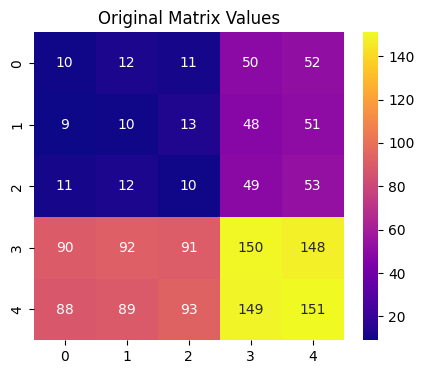

In [75]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(M, annot=True, cmap="plasma", fmt = 'd')
plt.title("Original Matrix Values")
plt.show()


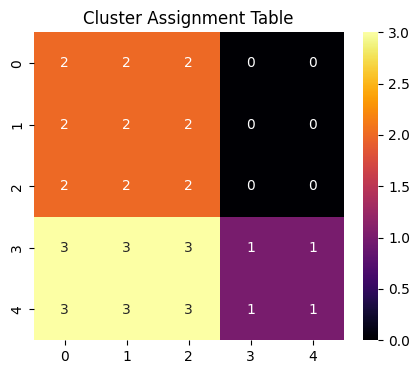

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(assignment_table, annot=True, cmap="inferno")
plt.title("Cluster Assignment Table")
plt.show()


The function seems to perform well


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
